In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Cuadrados medios
def funCuadradosMedios(xo,d,iteraciones):
    final = []
    xn = xo
    # print("It. \t Xn \t Ui \t Rn")
    for i in range(iteraciones):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
        rn = ui / (int('9'*d)+1)
    #   print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        final.append(rn)
        xn = ui

    return final

In [3]:
#Congruencia lineal
def funCongruenciaLineal(xo,a,b,m,iteraciones):
    final = []
    xn = xo
    # print("It. \t Xn \t Ui")
    for i in range(iteraciones):
        xnn = (a*xn+b) % m
        ui = xnn/m
        # print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        final.append(ui)
        xn = xnn
    return final

In [4]:
#tausworthe
def binario_a_decimal(numero_binario):
	numero_decimal = 0 

	for posicion, digito_string in enumerate(numero_binario[::-1]):
		numero_decimal += int(digito_string) * 2 ** posicion

	return numero_decimal
def funTausworthe(r,q,l,iteraciones):
    bits =[]

    #ingresar los valores [0,1] personalmente para el vector inicial
    # for x in range(0,q):
    #     bit = input('Ingrese un valor binario para el vector inicial de longitud '+str(q))
    #     bits.append(int(bit))

    #ooo, llenar directamente el vector inicial con 1
    for x in range(0,q):
        bits.append(1)

    # cantidad = (2**q) - 1 - q
    cantidad = iteraciones*l

    for i in range(q+1,cantidad+1):
        if bits[(i-r)-1] == bits[(i-q)-1]:
            bits.append(0)
        else:
            bits.append(1)

    vector = ''
    for x in range(0,len(bits)):
        vector = vector + str(bits[x])
        if (x+1) % q == 0:
            vector += ' '

    # print(vector)
    nGrupos = math.floor(len(bits)/l)
    # print('Se obtienen ',nGrupos, ' numeros decimales conformados de ', l, ' bits')
    # print('Sobran ', len(bits)-(l*nGrupos), ' bits no utilizados')

    grupos=[bits[i:i + l] for i in range(0, len(bits), l)]

    decimales = []

    for x in grupos:
        binario = ''
        for b in x:
            binario += str(b)
        decimales.append(binario_a_decimal(binario))

    dividido = ''
    divisor = 2**l
    final = []
    for x in decimales:
        dividido += str(x) + '/' + str(divisor) + ",  "
        final.append(x/divisor)

    # print(dividido)
    # print('Final: ',final)
    return final


In [5]:
#Random python
def funRandomPython(seed,iteraciones):
    final = []
    random.seed(seed)
    [final.append(random.random())for i in range(iteraciones)]
    return final

In [43]:
# Corrida arriba - abajo de la media (promedio)
def corridaAA(serie,za2):
    co = 1
    n0 = 0
    n1 = 0
    aux = serie[0]
    s = []
    for x in serie:
        if x < 0.5:
            n0 += 1
            s.append(0)
        else:
            n1 += 1
            s.append(1)

        if((aux < 0.5 and x >= 0.5) or (aux >= 0.5 and x < 0.5)):
            co += 1
        
        aux = x

    n = n0+n1
    # print(serie)
    # print("S = " , s)

    print("Co = " , co)
    print("n0 = " , n0)
    print("n1 = " , n1)
    # print("n = " , n)

    plt.figure()

    etiquetas = ['>=0.5', '<0.5']
    plt.pie([n1,n0], labels=etiquetas, autopct='%.2f %%')
    plt.title('Total de 0 y 1')
    plt.show()

    uco = valorEsperado(n0,n1,n)
    o2co = varianza(n0,n1,n)
    z0 = eiEstadistico(co,uco,o2co)

    # print("uco = " , uco)
    # print("o2co = " , o2co)
    # print("Z0 = " , z0)
    # print("Za/2 = " , za2)

    if(-za2<=z0 and z0<=za2):
        print("Los numeros del conjunto son independientes")
    else:
        print("Los numeros del conjunto no son independientes")

    
def valorEsperado(n0,n1,n):
    return (((2*n0*n1)/n) + 1/2)
    

def varianza(n0,n1,n):
    return ((2*n0*n1)*(2*n0*n1-n))/(n**2*(n-1))
    
def eiEstadistico(co,uco,o2co):
    return (co-uco)/(math.sqrt(o2co))





Cadrados medios
Co =  49
n0 =  41
n1 =  59


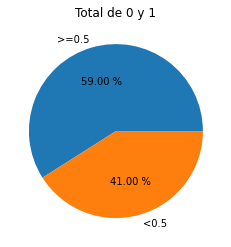

Los numeros del conjunto son independientes


In [44]:
print('Cadrados medios')
serie = funCuadradosMedios(74731897457,7,100)

corridaAA(serie, 1.960)

Congruencia lineal
Co =  45
n0 =  44
n1 =  56


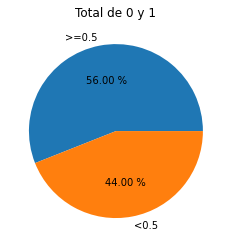

Los numeros del conjunto son independientes


In [45]:
print('Congruencia lineal')
serie = funCongruenciaLineal(7,74731897457,37747318974,19,100)

corridaAA(serie, 1.960)

Random de python
Co =  46
n0 =  57
n1 =  43


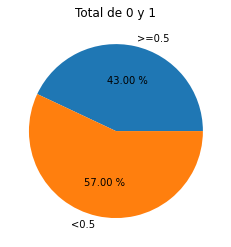

Los numeros del conjunto son independientes


In [46]:
print('Random de python')
serie = funRandomPython(1032022,100)

corridaAA(serie, 1.960)


Tausworthe
Co =  48
n0 =  42
n1 =  58


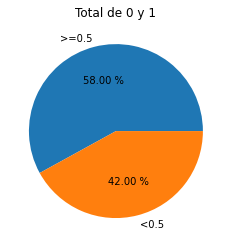

Los numeros del conjunto son independientes


In [47]:
print('Tausworthe')
serie = funTausworthe(7,15,7,100)

corridaAA(serie, 1.960)

#### Conclusion

Utilizando el metodo de la prueba de corrida arriba y abajo de la media, se puede observar que los 4 metodos de generacion de numeros pseudo-aleatorios cumplen la regla de independencia.
Tambien se puede observar que el metodo de tausworthe es el que obtiene un numero de corridas mas equilibrado, puesto que el numero de 0 y 1 son 50.